# **The fifth in-class-exercise (40 points in total, 04/12/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [4]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [17]:
import pandas as pd

def readDataSet(fielpath):
  data = open(fielpath).read()
  label, text = [], []
  for i, j in enumerate(data.split("\n")):
    c = j.split(' ')
    label.append(c[0])
    text.append(" ".join(c[1:]))
  return label, text

In [18]:
trainTuple = readDataSet('/content/sample_data/stsa-train.txt')
trainLabel = trainTuple[0]
trainText = trainTuple[1]

In [19]:
testTuple = readDataSet('/content/sample_data/stsa-test.txt')
testLabel = testTuple[0]
testText = testTuple[1]

In [20]:
traindf = pd.DataFrame (list(zip(trainText, trainLabel)) , 
                   columns = ['Raw Text', 'Labels'])

In [21]:
traindf.head()

,Raw Text,Labels
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [22]:
test_df = pd.DataFrame (list(zip(testText, testLabel)) ,
                        columns = ['Raw Text', 'Labels'])

In [23]:
test_df.head()

,Raw Text,Labels
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [24]:
test_df = test_df.dropna()
test_df.head()

,Raw Text,Labels
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [25]:
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.stem import PorterStemmer
from textblob import Word
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

def lowerCase(reviews_list):
  return reviews_list.apply(lambda x: " ".join(x.lower() for x in x.split()))


def removePunctuation(reviews_list):
  return reviews_list.str.replace('[^\w\s]','')


def removeSpecialCharcters(reviews_list):
  return reviews_list.apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))


def removeStopWords(reviews_list):
  stop = stopwords.words('english')
  return reviews_list.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

def correctSpelling(reviews_list):
  return reviews_list.apply(lambda x: str(TextBlob(x).correct()))

def Tokenisation(reviews_list):
  return reviews_list.apply(lambda x: TextBlob(x).words)

def stemming(reviews_list):
  ps = PorterStemmer()
  return reviews_list.apply(lambda x: " ".join([ps.stem(word) for word in x]))

def lemmitization(reviews_list):
  return reviews_list.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
reviewtextList = traindf['Raw Text']
reviewtextList = lowerCase(reviewtextList)
reviewtextList = removePunctuation(reviewtextList)
reviewtextList = removeSpecialCharcters(reviewtextList)
reviewtextList = removeStopWords(reviewtextList)
reviewtextList = Tokenisation(reviewtextList)
reviewtextList = stemming(reviewtextList)
reviewtextList = lemmitization(reviewtextList)

In [28]:
traindf['After Preproessing'] = reviewtextList

In [29]:
traindf.head()

,Raw Text,Labels,After Preproessing
0,"a stirring , funny and finally transporting re...",1,stir funni final transport reimagin beauti bea...
1,apparently reassembled from the cutting-room f...,0,appar reassembl cuttingroom floor given daytim...
2,they presume their audience wo n't sit still f...,0,presum audienc wo nt sit still sociolog lesson...
3,this is a visually stunning rumination on love...,1,visual stun rumin love memori histori war art ...
4,jonathan parker 's bartleby should have been t...,1,jonathan parker bartlebi beallendal modernoffi...


In [30]:
reviewtextList = test_df['Raw Text']
reviewtextList = lowerCase(reviewtextList)
reviewtextList = removePunctuation(reviewtextList)
reviewtextList = removeSpecialCharcters(reviewtextList)
reviewtextList = removeStopWords(reviewtextList)
reviewtextList = Tokenisation(reviewtextList)
reviewtextList = stemming(reviewtextList)
reviewtextList = lemmitization(reviewtextList)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.


In [31]:
test_df['After Preproessing'] = reviewtextList

In [32]:
test_df.head()

,Raw Text,Labels,After Preproessing
0,"no movement , no yuks , not much of anything .",0,movement yuk much anyth
1,"a gob of drivel so sickly sweet , even the eag...",0,gob drivel sickli sweet even eager consum moor...
2,"gangs of new york is an unapologetic mess , wh...",0,gang new york unapologet mess whose save grace...
3,"we never really feel involved with the story ,...",0,never realli feel involv stori idea remain abs...
4,this is one of polanski 's best films .,1,one polanski best film


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm

def getX_tfidf(df):
  train_idf_vect = TfidfVectorizer(analyzer='word')
  train_idf_vect.fit(df['After Preproessing'])
  x_tfidf =  train_idf_vect.transform(df['After Preproessing'])
  return x_tfidf

def getTest_X_tfidf(df):
  train_idf_vect = TfidfVectorizer(analyzer='word')
  vec = TfidfVectorizer(analyzer='word', 
                        stop_words = "english", 
                        lowercase = True)
  vec.fit(df['After Preproessing'])
  x_tfidf =  vec.transform(df['After Preproessing'])
  return x_tfidf

In [47]:
x_tfidf = getX_tfidf(traindf)

In [51]:
xtest = getTest_X_tfidf(test_df)

In [52]:
test_y = test_df['Labels']

In [53]:

from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x_tfidf, 
                                                                      traindf['Labels'].values,test_size=0.2)

In [54]:
def get_metrics(predictions, test_data_y):
  acc = metrics.accuracy_score(predictions, test_data_y)
  prec = metrics.precision_score(predictions, test_data_y, pos_label='positive', average='micro')
  recall = metrics.recall_score(predictions, test_data_y, pos_label='positive', average='micro')
  f1 = metrics.f1_score(predictions, test_data_y, pos_label='positive', average='micro')
  return acc, prec, recall, f1

def cross_validation_score(modelName, x, y):
  scoring = 'accuracy'
  kfold = KFold(10, random_state = 7,shuffle=True)
  cross_val = cross_val_score(modelName, x, y, cv=kfold).mean()
  return cross_val

In [58]:
nbm = naive_bayes.MultinomialNB()
nbm.fit(train_x, train_y)

nbpvdata = nbm.predict(valid_x)
acc, prec, recall, f1 = get_metrics(nbpvdata, valid_y)
print("Accuracy is ", acc,"\nPrecision is",prec,"\nRecall is:",recall,"\nF1 is:",f1)

nb_scores_mean = cross_validation_score(nbm, valid_x, valid_y)
print('Navie Bayes Cross Validation Score is ',nb_scores_mean)

testing_mean = cross_validation_score(nbm, xtest, test_y)
print('Navie Bayes Cross Validation Score is ', testing_mean)

Accuracy is  0.776173285198556 
Precision is 0.776173285198556 
Recall is: 0.776173285198556 
F1 is: 0.7761732851985559
Navie Bayes Cross Validation Score is  0.7198675841935147
Navie Bayes Cross Validation Score is  0.7315859004383596


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


# SVM

In [59]:

svm_model = svm.SVC()

svm_model.fit(train_x, train_y)

svm_predictions_validation_data = svm_model.predict(valid_x)

accuracy, precision, recall, f1 = get_metrics(svm_predictions_validation_data, valid_y)

print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

svm_mean = cross_validation_score(svm_model, valid_x, valid_y)
print('SVM Cross Validation Score is', svm_mean)

svm_test_scores_mean = cross_validation_score(svm_model, xtest, test_y)
print('SVM Cross Validation Score is {0}'.format(svm_test_scores_mean))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.7783393501805054 
Precision is 0.7783393501805054 
Recall is: 0.7783393501805054 
F1 is: 0.7783393501805055
SVM Cross Validation Score is 0.7198727974142425
SVM Cross Validation Score is 0.7376298564823156


# KNN

In [60]:

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 15)
knn_model.fit(train_x, train_y)


knn_predictions_valid_data = knn_model.predict(valid_x)


accuracy, precision, recall, f1 = get_metrics(knn_predictions_valid_data, valid_y)
print("Accuracy is ", 
      accuracy,"\nPrecision is",precision,
      "\nRecall is:",recall,
      "\nF1 is:",f1)

knn_scores_mean = cross_validation_score(knn_model, valid_x, valid_y)
print('KNN Cross Validation Score is', knn_scores_mean)

knn_test_scores_mean = cross_validation_score(knn_model, xtest, test_y)
print('KNN Cross Validation Score is', knn_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.7054151624548737 
Precision is 0.7054151624548737 
Recall is: 0.7054151624548737 
F1 is: 0.7054151624548737
KNN Cross Validation Score is 0.6859712230215828
KNN Cross Validation Score is 0.6706569386897255


# Decision Tree

In [61]:

from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(train_x, train_y)
dt_predictions_valid_data = decision_tree_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(dt_predictions_valid_data, valid_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

decision_tree_scores_mean = cross_validation_score(decision_tree_model, valid_x, valid_y)
print('Decision Tree Cross Validation Score is',decision_tree_scores_mean)

decision_tree_test_scores_mean = cross_validation_score(decision_tree_model, xtest, test_y)
print('Decision Tree Cross Validation Score is', decision_tree_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.7025270758122744 
Precision is 0.7025270758122744 
Recall is: 0.7025270758122744 
F1 is: 0.7025270758122744
Decision Tree Cross Validation Score is 0.6389740381607757
Decision Tree Cross Validation Score is 0.6338617666486519


# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()

random_forest_model.fit(train_x, train_y)

random_forest_predictions_valid_data = random_forest_model.predict(valid_x)

accuracy, precision, recall, f1 = get_metrics(random_forest_predictions_valid_data, valid_y)
print("Accuracy is ", 
      accuracy,"\nPrecision is",precision,
      "\nRecall is:",recall,
      "\nF1 is:",f1)

random_forest_scores_mean = cross_validation_score(random_forest_model, valid_x, valid_y)
print('Random Forest Cross Validation Score is {0}'.format(random_forest_scores_mean))

random_forest_test_scores_mean = cross_validation_score(random_forest_model, xtest, test_y)
print('Random Forest Cross Validation Score is', random_forest_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.748014440433213 
Precision is 0.748014440433213 
Recall is: 0.748014440433213 
F1 is: 0.748014440433213
Random Forest Cross Validation Score is 0.6989677822959024
Random Forest Cross Validation Score is 0.6800126103404792


# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 15)

knn_model.fit(train_x, train_y)

knn_predictions_valid_data = knn_model.predict(valid_x)

accuracy, precision, recall, f1 = get_metrics(knn_predictions_valid_data, valid_y)
print("Accuracy is ", accuracy,
      "\nPrecision is",precision,
      "\nRecall is:",recall,"\nF1 is:",f1)

knn_scores_mean = cross_validation_score(knn_model, valid_x, valid_y)
print('KNN Cross Validation Score is', knn_scores_mean)


knn_test_scores_mean = cross_validation_score(knn_model, xtest, test_y)
print('KNN Cross Validation Score is', knn_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.7054151624548737 
Precision is 0.7054151624548737 
Recall is: 0.7054151624548737 
F1 is: 0.7054151624548737
KNN Cross Validation Score is 0.6859712230215828
KNN Cross Validation Score is 0.6706569386897255


# XGBoost

In [65]:
from xgboost import XGBClassifier

xg_boost_model = XGBClassifier()

xg_boost_model.fit(train_x, train_y)

xg_boost_predictions_valid_data = xg_boost_model.predict(valid_x)

accuracy, precision, recall, f1 = get_metrics(xg_boost_predictions_valid_data, valid_y)

print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

xg_boost_scores_mean = cross_validation_score(XGBClassifier(), valid_x, valid_y)
print('XG Boost Cross Validation Score is ', xg_boost_scores_mean)


xg_boost_test_scores_mean = cross_validation_score(XGBClassifier(), xtest, test_y)
print('XG Boost Cross Validation Score is',xg_boost_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.6570397111913358 
Precision is 0.6570397111913358 
Recall is: 0.6570397111913358 
F1 is: 0.6570397111913358
XG Boost Cross Validation Score is  0.6309925972265666
XG Boost Cross Validation Score is 0.6322554494685642


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [1]:
import pandas as pd

amazon_df = pd.read_csv("/content/sample_data/Amazon_Unlocked_Mobile.csv")
amazon_df = amazon_df.head(5000)

print(amazon_df.shape)

amazon_df = amazon_df.dropna()
print(amazon_df.shape)

(5000, 6)
(3422, 6)


In [6]:
amazon_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
4995,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,positive,This review is not for the product as you may ...,64.0
4996,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,positive,The product was in good structure. I'm still n...,0.0
4997,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,negative,The iPhone was fine. It works and is in good c...,157.0
4998,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,positive,Screen cracked really quick.,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


positive    2787
negative     635
Name: Rating, dtype: int64

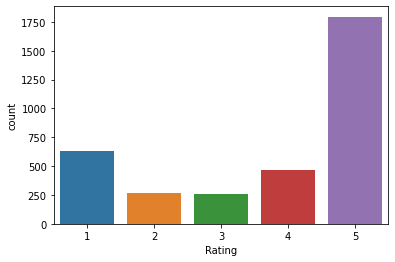

In [2]:
import seaborn as sns
sns.countplot(amazon_df.Rating)

def Classification_review(rating):
    if rating < 2:
        return 'negative'
    return 'positive'

Classification_rating = amazon_df['Rating'].map(Classification_review) 
amazon_df['Rating'] = Classification_rating
amazon_df['Rating'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


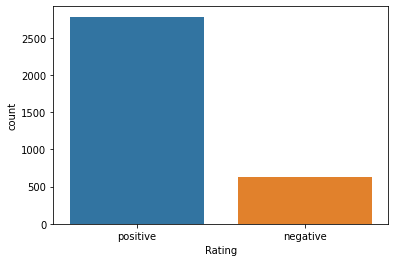

In [3]:
import seaborn as sns
sns.countplot(amazon_df.Rating)

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
import re

c=0;
for i in amazon_df['Reviews'].values:
    if (len(re.findall('<.*?>', i))):
        print(c)
        print(i)
        break;
    c += 1;

def html(sentence):
    cleaned= re.compile('<.*?>')
    cleaned_text = re.sub(cleaned, ' ', sentence)
    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [5]:
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.stem import PorterStemmer
from textblob import Word
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

def lowerCase(reviews_list):
  return reviews_list.apply(lambda x: " ".join(x.lower() for x in x.split()))


def removePunctuation(reviews_list):
  return reviews_list.str.replace('[^\w\s]','')


def removeSpecialCharcters(reviews_list):
  return reviews_list.apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))


def removeStopWords(reviews_list):
  stop = stopwords.words('english')
  return reviews_list.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

def correctSpelling(reviews_list):
  return reviews_list.apply(lambda x: str(TextBlob(x).correct()))

def Tokenisation(reviews_list):
  return reviews_list.apply(lambda x: TextBlob(x).words)

def stemming(reviews_list):
  ps = PorterStemmer()
  return reviews_list.apply(lambda x: " ".join([ps.stem(word) for word in x]))

def lemmitization(reviews_list):
  return reviews_list.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [7]:
reviewtextList = amazon_df['Reviews']
reviewtextList = lowerCase(reviewtextList)
reviewtextList = removePunctuation(reviewtextList)
reviewtextList = removeSpecialCharcters(reviewtextList)
reviewtextList = removeStopWords(reviewtextList)
reviewtextList = Tokenisation(reviewtextList)
reviewtextList = stemming(reviewtextList)
reviewtextList = lemmitization(reviewtextList)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.


In [8]:
amazon_df['Preprocessed Reviews'] = reviewtextList

In [9]:
amazon_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Preprocessed Reviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucki found use phone u use hard phone li...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revu clean set e...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0,plea
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0,work good goe slow sometim good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0,great phone replac lost phone thing volum butt...
...,...,...,...,...,...,...,...
4995,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,positive,This review is not for the product as you may ...,64.0,review product may find everywher www world qu...
4996,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,positive,The product was in good structure. I'm still n...,0.0,product good structur im still use brazil unlo...
4997,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,negative,The iPhone was fine. It works and is in good c...,157.0,iphon fine work good condit one major thing wr...
4998,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,positive,Screen cracked really quick.,0.0,screen crack realli quick


# k means


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vector_count = CountVectorizer()
counted = vector_count.fit_transform(amazon_df['Preprocessed Reviews'].values)
column_names = vector_count.get_feature_names()
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10, init='k-means++', random_state=99)
model.fit(counted)

label = model.labels_
cc = model.cluster_centers_
print(cc)

from sklearn import metrics
ss = metrics.silhouette_score(counted, label, metric='euclidean')
print(ss)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[[0.         0.         0.00343643 ... 0.         0.0137457  0.00687285]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00775194 0.         0.         ... 0.00775194 0.         0.01550388]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
0.20520549241656483


In [13]:
data_frame = amazon_df
data_frame['Bow Clus Label'] = model.labels_
data_frame.groupby(['Bow Clus Label'])['Reviews'].count()

Bow Clus Label
0     291
1       6
2     129
3       1
4     788
5      14
6    2190
7       1
8       1
9       1
Name: Reviews, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cluster 0: phone
 screen
 use
 good
 great
 like
 get
 one
 work
 would
Cluster 1: phone
 use
 like
 camera
 dont
 work
 app
 screen
 time
 batteri
Cluster 2: phone
 use
 screen
 like
 good
 one
 app
 get
 great
 work
Cluster 3: phone
 card
 use
 iphon
 sim
 carrier
 camera
 screen
 sound
 featur
Cluster 4: phone
 work
 great
 screen
 use
 good
 one
 get
 price
 like
Cluster 5: phone
 screen
 one
 use
 get
 app
 would
 camera
 good
 day
Cluster 6: phone
 work
 great
 good
 love
 like
 use
 price
 screen
 excel
Cluster 7: phone
 camera
 like
 featur
 one
 idol
 use
 sound
 devic
 qualiti
Cluster 8: phone
 like
 realli
 screen
 one
 ive
 problem
 seem
 pretti
 nice
Cluster 9: phone
 qualiti
 good
 one
 moto
 camera
 like
 light
 use
 app


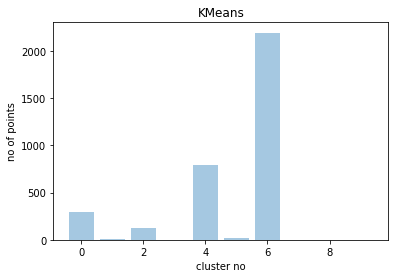

In [14]:
order = model.cluster_centers_.argsort()[:, ::-1]
terms_count = vector_count.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order[i, :10]:
        print(' %s' % terms_count[ind], end='')
        print()

import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], data_frame.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans')
plt.xlabel("cluster no")
plt.ylabel("no of points")
plt.show()

In [16]:
l = []
for i in amazon_df['Preprocessed Reviews'].values:
    l.append(i.split())

import gensim
w_v_model=gensim.models.Word2Vec(l,size=100, workers=4)


import numpy as np
vector_sentence = []
for i in l:
  sentence_vector = np.zeros(100)
  count = 0
  for word in i:
    try:
      vec = w_v_model.wv[word]
      sentence_vector += vec
      count += 1
    except:
      pass
  sentence_vector /= count
  vector_sentence.append(sentence_vector)
vector_sentence = np.array(vector_sentence)
vector_sentence = np.nan_to_num(vector_sentence)
vector_sentence.shape

num_clus = [x for x in range(3,11)]
num_clus


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


[3, 4, 5, 6, 7, 8, 9, 10]

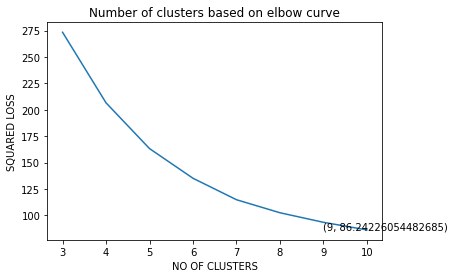

minimal number of clusters obtained is -  9
Loss for each minimal cluster is -  86.24226054482685


In [17]:
error= []
for i in num_clus:
    kmeans = KMeans(n_clusters = i).fit(vector_sentence)
    error.append(kmeans.inertia_)
    
minimal_cluster = np.argmin(error) + 2 
plt.plot(num_clus, error)
plt.title("Number of clusters based on elbow curve")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("SQUARED LOSS")
xy = (minimal_cluster, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("minimal number of clusters obtained is - ", minimal_cluster)
print ("Loss for each minimal cluster is - ", min(error))

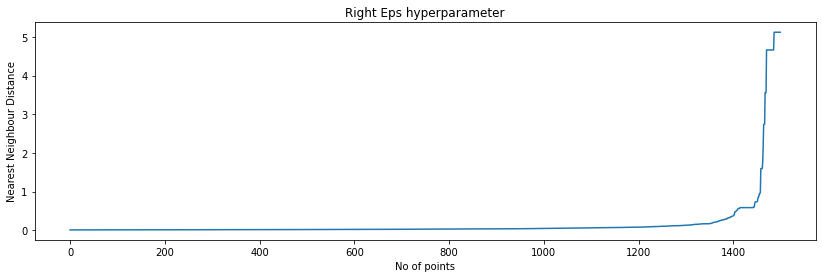

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,3422,3422,3422


In [18]:
#DBSCAN CLUSTERING

from sklearn.cluster import DBSCAN
minPts = 2 * 100
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def neighbour_nearest(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

neighbour = []
for i in vector_sentence[:1500]:
    neighbour.append( neighbour_nearest(i, vector_sentence[:1500]) )
neighbour.sort()

plt.figure(figsize=(14,4))
plt.title("Right Eps hyperparameter")
plt.plot([x for x in range(len(neighbour))], neighbour)
plt.xlabel("No of points")
plt.ylabel("Nearest Neighbour Distance")
plt.show()

model_1 = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model_1.fit(vector_sentence)

dbscan_cluster = data_frame
dbscan_cluster['AVG-W2V Clus Label'] = model_1.labels_
dbscan_cluster.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

# Hierarchical clustering

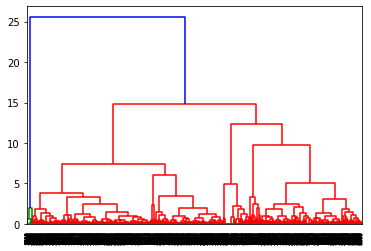

In [19]:
import scipy
from scipy.cluster import hierarchy
hirera_cluster=hierarchy.dendrogram(hierarchy.linkage(vector_sentence, method='ward'))
plt.axhline(y=35)

In [20]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg=cluster.fit_predict(vector_sentence)

hier_cluster = dbscan_cluster
hier_cluster['AVG-W2V Clus Label'] = cluster.labels_

hier_cluster.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(hier_cluster.iloc[hier_cluster.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(hier_cluster.iloc[hier_cluster.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
was not in good condition but does work good


excellent


______________________________________________________________

# In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

1. K Means clustering can handle large data better than hierarchical clustering. 
This is because K Means has a linear time complexity of O(n), whereas hierarchical 
clustering has a quadratic time complexity of O(n) (n2)

2. Because we start with a random selection of clusters in K Means clustering, 
the results obtained by executing the procedure numerous times may differ. 
In Hierarchical clustering, the results are repeatable.

3. When the clusters are hyper spherical, K Means is found to operate well (like circle in 2D, sphere in 3D).

4. Prior knowledge of K, i.e. the number of clusters you intend to divide your data into, 
is required for K Means clustering. However, by analyzing the dendrogram,
you can stop at any number of clusters you think appropriate in hierarchical clustering.